Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [6]:
labels_all = pd.read_csv("D:/ml_projects/dog-breed-identification/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
#visualize the number of eah breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [8]:
#selecting first 3 breeds(limitation due to computation power)
CLASS_NAMES =['scottish_deerhound','maltese_dog','afghan_hound ']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,161,03dc61595ad9dbf49e3998cf586ca8cb,scottish_deerhound


In [9]:
#creating numpy matrix with zeros
X_data = np.zeros((len(labels),224,224,3),dtype='float32')
#one hot encoding
Y_data = label_binarize(labels['breed'],classes=CLASS_NAMES)

#Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('D:/ml_projects/dog-breed-identification/train/%s.jpg' % labels['id'][i],target_size=(224,224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(),axis=0)
    X_data[i] = x/255.0
    
#printing train image and one hot encode shape & size
print('\nTrain Image shape:',X_data.shape,' size:{:,}'.format(X_data.size))
print('One-hot encoded output shape:',Y_data.shape,' size:{:,}'.format(Y_data.size))


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:09<00:00, 25.65it/s]


Train Image shape: (243, 224, 224, 3)  size:36,578,304
One-hot encoded output shape: (243, 3)  size:729


In [10]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

In [11]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)


In [12]:
X_train.shape


(174, 224, 224, 3)

In [13]:
X_val.shape


(44, 224, 224, 3)

In [14]:
Y_train.shape


(174, 3)

In [15]:
Y_val.shape

(44, 3)

In [16]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 48s 8s/step - loss: 4.9191 - accuracy: 0.3966 - val_loss: 4.8924 - val_accuracy: 0.5682
Epoch 2/100
2/2 [==============================] - 21s 6s/step - loss: 4.8882 - accuracy: 0.5345 - val_loss: 4.8600 - val_accuracy: 0.5909
Epoch 3/100
2/2 [==============================] - 16s 5s/step - loss: 4.8546 - accuracy: 0.5632 - val_loss: 4.8223 - val_accuracy: 0.6364
Epoch 4/100
2/2 [==============================] - 19s 5s/step - loss: 4.8154 - accuracy: 0.5460 - val_loss: 4.7786 - val_accuracy: 0.6364
Epoch 5/100
2/2 [==============================] - 18s 5s/step - loss: 4.7697 - accuracy: 0.5517 - val_loss: 4.7294 - val_accuracy: 0.5909
Epoch 6/100
2/2 [==============================] - 20s 6s/step - loss: 4.7172 - accuracy: 0.5862 - val_loss: 4.6735 - val_accuracy: 0.5909
Epoch 7/100
2/2 [==============================] - 17s 5s/step - loss: 4.6578 - accuracy: 0.6092 - val_loss: 4.6116 - val_accuracy: 0.6136
Epoch 8/100
2/2 [==========

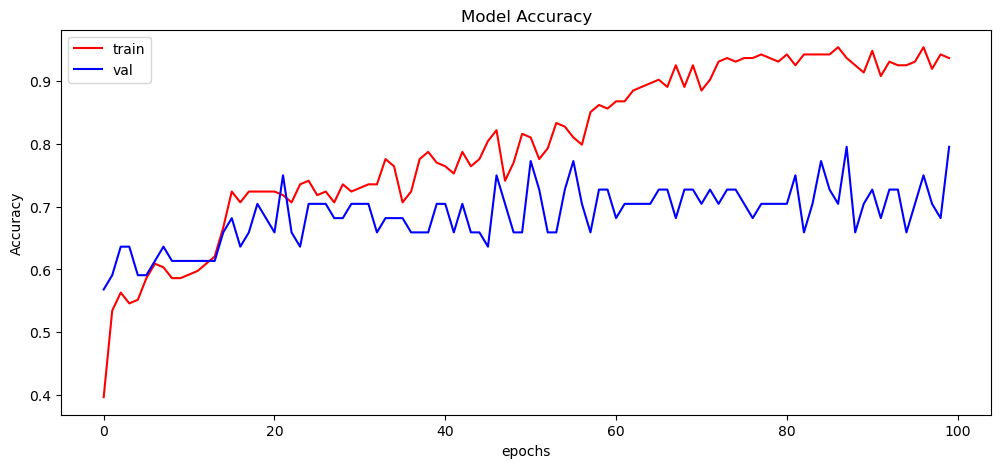

In [17]:
#plot the rraining history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

In [18]:
Y_pred = model.predict(X_test)
score=model.evaluate(X_test,Y_test)
print('Accuracy over the test set: \n',round((score[1]*100),2),"%")


1/1 [==============================] - 0s 425ms/step - loss: 2.6225 - accuracy: 0.8800
Accuracy over the test set: 
 88.0 %


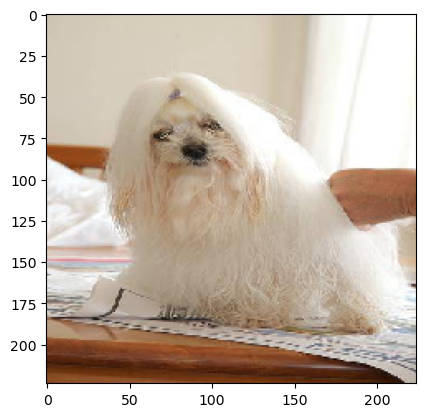

originally: maltese_dog
Predicted: maltese_dog


In [19]:
#plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

print('originally:',labels['breed'][np.argmax(Y_test[1])])
print('Predicted:',labels['breed'][np.argmax(Y_pred[1])])


In [20]:
model.save("dog_breed_predictor.h5")

C:\Users\pavit\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
